In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
matches = pd.read_csv('C:/Users/Hp/Desktop/WPL/matches.csv')
deliveries = pd.read_csv('C:/Users/Hp/Desktop/WPL/deliveries.csv')

In [4]:
all_matches = matches[(matches['team1'].isin(['Royal Challengers Bangalore', 'Delhi Capitals'])) & (matches['team2'].isin(['Royal Challengers Bangalore', 'Delhi Capitals']))]

In [3]:
data = pd.merge(matches, deliveries, how = "inner", left_on = 'id', right_on = 'match_id')

In [5]:
sub_data = data[(data['team1'].isin(['Royal Challengers Bangalore', 'Delhi Capitals'])) & (data['team2'].isin(['Royal Challengers Bangalore', 'Delhi Capitals']))]

### Who will win the match??

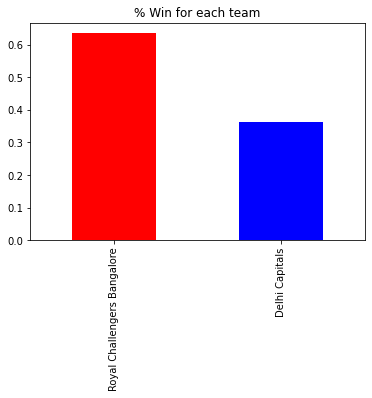

In [8]:
all_matches['winner'].value_counts(normalize=True).plot.bar(title='% Win for each team', color=['Red', 'Blue'])

In [9]:
match_id_1 = all_matches.groupby('season')['id'].unique().apply(lambda x : x[0]).values.tolist()
match_id_2 = all_matches.groupby('season')['id'].unique().apply(lambda x : x[1] if len(x)>1 else x[0]).values.tolist()

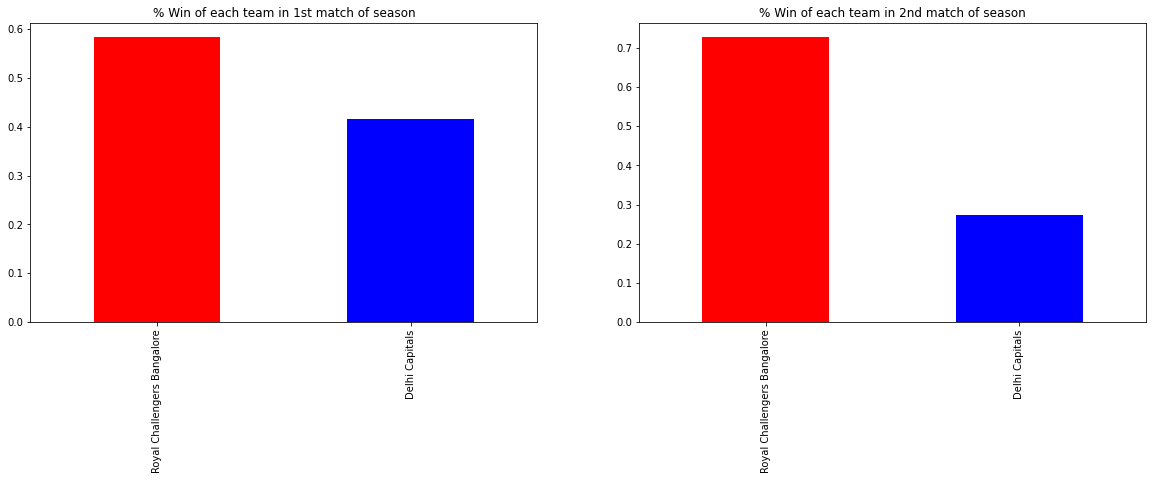

In [11]:
plt.subplot(1, 2 ,1)
all_matches[all_matches['id'].isin(match_id_1)]['winner'].value_counts(normalize=True).plot.bar(title='% Win of each team in 1st match of season', figsize=(20,5.5), color = ['Red', 'Blue'])

plt.subplot(1, 2, 2)
all_matches[all_matches['id'].isin(match_id_2)]['winner'].value_counts(normalize=True).plot.bar(title='% Win of each team in 2nd match of season', color = ['Red', 'Blue'])

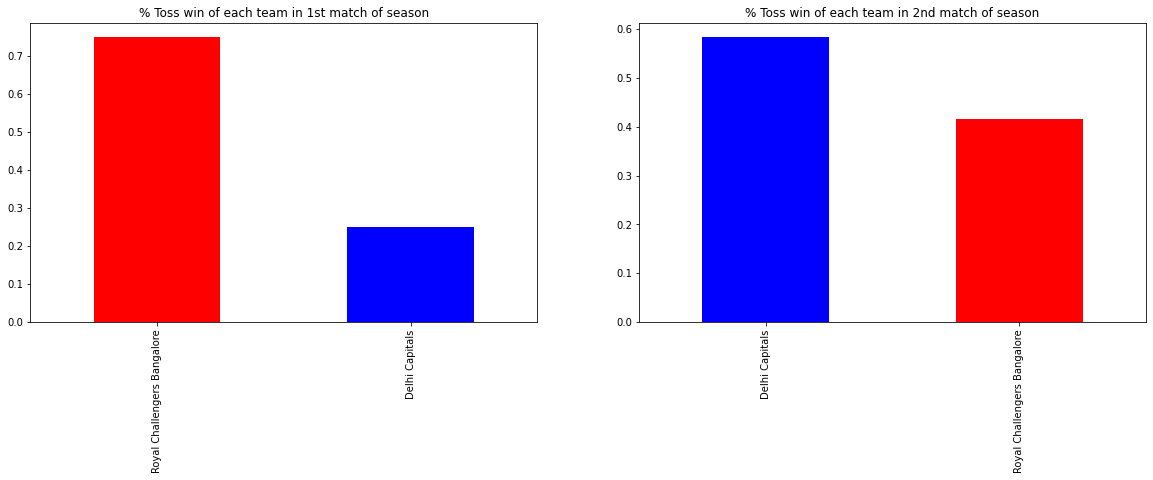

In [13]:
plt.subplot(1, 2 ,1)
all_matches[all_matches['id'].isin(match_id_1)]['toss_winner'].value_counts(normalize=True).plot.bar(title='% Toss win of each team in 1st match of season', figsize=(20,5.5), color = ['Red', 'Blue'])

plt.subplot(1, 2, 2)
all_matches[all_matches['id'].isin(match_id_2)]['toss_winner'].value_counts(normalize=True).plot.bar(title='% Toss win of each team in 2nd match of season', color = ['Blue', 'Red'])

In [14]:
pd.crosstab(all_matches['toss_winner'], all_matches['toss_decision'])

toss_decision,bat,field
toss_winner,,
Delhi Capitals,3,7
Royal Challengers Bangalore,3,10


In [15]:
pd.crosstab(all_matches['toss_decision'], all_matches['winner'])

winner,Delhi Capitals,Royal Challengers Bangalore
toss_decision,,
bat,3,3
field,5,11


In [16]:
all_matches.groupby(['season', 'winner'])['win_by_runs', 'win_by_wickets'].max()

win_by_runs  win_by_wickets
season winner                                                  
2008   Delhi Capitals                        10               5
2009   Delhi Capitals                         0               6
       Royal Challengers Bangalore            0               7
2010   Delhi Capitals                        37               0
2011   Royal Challengers Bangalore            0               3
2012   Royal Challengers Bangalore           21               0
2013   Royal Challengers Bangalore            4               0
2014   Royal Challengers Bangalore           16               8
2015   Royal Challengers Bangalore            0              10
2016   Delhi Capitals                         0               7
       Royal Challengers Bangalore            0               6
2017   Royal Challengers Bangalore           15               0
2018   Royal Challengers Bangalore            0               6
2019   Delhi Capitals                        16               4

In [21]:
key_batters = ['V Kohli', 'AB de Villiers', 'Washington Sundar', 'P Shaw', 'S Dhawan', 'RR Pant', 'SS Iyer', 'MP Stoinis']
key_bowlers = ['K Rabada', 'Washington Sundar', 'N Saini', 'Mohaemmed Siraj', 'YS Chahal']

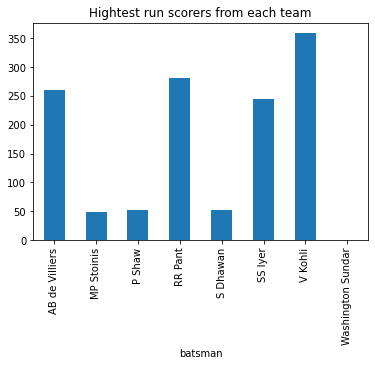

In [23]:
sub_data[(sub_data['batsman'].isin(key_batters)) & (sub_data['season']>2015)].groupby(['batsman'])['batsman_runs'].sum().plot.bar(title='Hightest run scorers from each team')

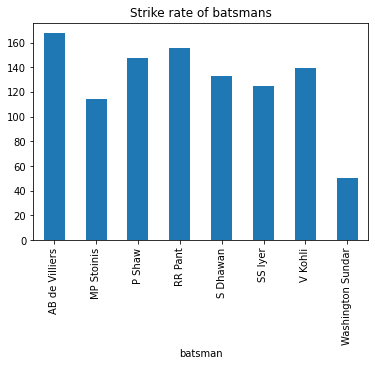

In [28]:
((sub_data[(sub_data['batsman'].isin(key_batters)) & (sub_data['season']>2015)].groupby(['batsman'])['batsman_runs'].sum()/sub_data[(sub_data['batsman'].isin(key_batters)) & (sub_data['season']>2015)].groupby(['batsman'])['ball'].count())*100).plot.bar(title='Strike rate of batsmans')

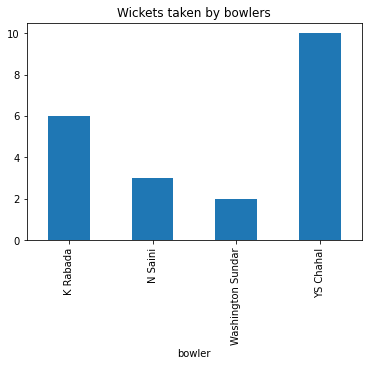

In [31]:
sub_data[(sub_data['season']>2015) & (sub_data['bowler'].isin(key_bowlers))].groupby('bowler')['player_dismissed'].count().plot.bar(title='Wickets taken by bowlers')

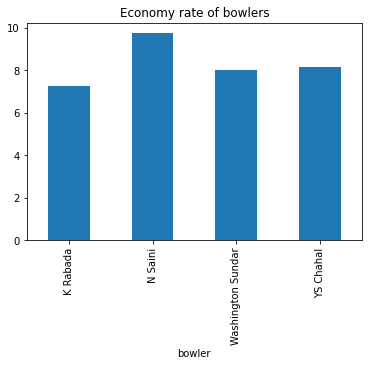

In [36]:
round(sub_data[(sub_data['season']>2015) & (sub_data['bowler'].isin(key_bowlers))].groupby(['match_id', 'bowler'])['total_runs'].sum()/sub_data[(sub_data['season']>2015) & (sub_data['bowler'].isin(key_bowlers))].groupby(['match_id', 'bowler'])['over'].unique().apply(lambda x : len(x)), 2).groupby('bowler').mean().plot.bar(title='Economy rate of bowlers')

In [39]:
sub_data[(sub_data['season']>2015) & (sub_data['bowler'].isin(key_bowlers))].groupby(['bowler', 'batsman'])['player_dismissed'].count().sort_values(ascending=False).head(10)

bowler             batsman          
YS Chahal          JJ Roy               2
Washington Sundar  SS Iyer              2
K Rabada           AB de Villiers       1
N Saini            SS Iyer              1
                   CH Morris            1
                   C Ingram             1
K Rabada           Washington Sundar    1
                   V Kohli              1
                   PA Patel             1
                   P Negi               1
Name: player_dismissed, dtype: int64

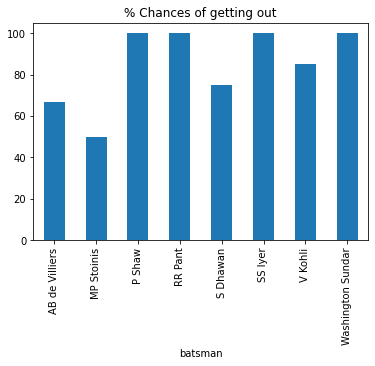

In [46]:
((sub_data[sub_data['batsman'].isin(key_batters)].groupby('batsman')['player_dismissed'].count()/sub_data[sub_data['batsman'].isin(key_batters)].groupby('batsman')['match_id'].unique().apply(lambda x : len(x)))*100).plot.bar(title='% Chances of getting out')

### How many batsman with strike rate above 130 and more than 3 boundaries??

In [159]:
dummy = pd.DataFrame(sub_data[sub_data['season']>2015].groupby(['match_id', 'batsman'])['ball'].count())
index = dummy[dummy['ball']>10].index
sub_data1 = sub_data[sub_data['season']>2015]

In [160]:
for i, j in index:
    sub_data1.drop(sub_data1[(sub_data1['match_id']==i) & (sub_data1['batsman']==j)].index, inplace=True)

In [161]:
dummy1 = pd.DataFrame(sub_data1[sub_data1['batsman_runs'].isin([4, 5, 6, 7])].groupby(['match_id', 'batsman'])['batsman_runs'].value_counts())

In [162]:
sub_dummy1 = dummy1.rename(columns={'batsman_runs' : 'total_boundaries_count'}).reset_index()

In [163]:
index1 = sub_dummy1[(sub_dummy1['batsman_runs'].isin([4, 5])) & (sub_dummy1['total_boundaries_count']<2)].set_index(['match_id', 'batsman']).index

In [164]:
for i, j in index1:
    sub_data1.drop(sub_data1[(sub_data1['match_id']==i) & (sub_data1['batsman']==j)].index, inplace=True)

In [167]:
sub_data1[sub_data1['batsman_runs'].isin([4, 6])].groupby(['match_id', 'batsman'])['batsman_runs'].count()

match_id  batsman       
5         Mandeep Singh     3
          P Negi            1
          Vishnu Vinod      1
55        A Mishra          1
          KM Jadhav         1
          Mohammed Shami    4
          P Negi            3
          PJ Cummins        1
          Sachin Baby       2
632       KK Nair           1
7912      R Tewatia         3
7938      PA Patel          2
          SN Khan           2
11337     AR Patel          3
          P Shaw            4
Name: batsman_runs, dtype: int64

### How many balls will Rabada will take to get his first wicket??

In [169]:
def Count(df):
    balls = 0
    for i in df.player_dismissed_bool:
        if i == 1:
            break
        else:
            balls += 1
    return balls

In [171]:
sub_data[sub_data['bowler']=='K Rabada'].groupby(['match_id']).apply(Count)

match_id
11311     6
11337    10
dtype: int64

In [176]:
dummy2 = pd.DataFrame(sub_data[sub_data['total_runs']==0].groupby(['match_id', 'bowler'])['ball'].count())

In [182]:
index2 = dummy2[dummy2['ball']<=8].index

In [183]:
sub_data3 = sub_data.copy()

In [184]:
for i, j in index2:
    sub_data3.drop(sub_data3[(sub_data3['match_id']==i) & (sub_data3['bowler']==j)].index, inplace=True)

In [187]:
dummy3 = pd.DataFrame(sub_data[sub_data['total_runs'].isin([4, 5, 6, 7])].groupby(['match_id', 'bowler'])['total_runs'].count())

In [191]:
index3 = dummy3[dummy3['total_runs']>=4].index

In [192]:
for i, j in index3:
    sub_data3.drop(sub_data3[(sub_data3['match_id']==i) & (sub_data3['bowler']==j)].index, inplace=True)

In [195]:
(sub_data3[sub_data3['season']>2015].groupby(['match_id', 'bowler'])['total_runs'].sum()/sub_data3.groupby(['match_id', 'bowler'])['ball'].count()).sort_values()

match_id  bowler         
5         S Nadeem           0.520000
55        SR Watson          0.666667
5         YS Chahal          0.833333
55        PJ Cummins         0.846154
5         SR Watson          0.875000
11311     K Rabada           0.880000
          M Ali              0.916667
          N Saini            1.000000
55        Avesh Khan         1.000000
7938      M Ali              1.038462
587       SR Watson          1.120000
632       SR Watson          1.125000
11311     CH Morris          1.153846
7938      YS Chahal          1.166667
7912      YS Chahal          1.315789
7938      S Lamichhane       1.375000
          C de Grandhomme    2.000000
76        DW Steyn                NaN
          SB Joshi                NaN
          V Kohli                 NaN
104       A Kumble                NaN
          GD McGrath              NaN
          MF Maharoof             NaN
          VY Mahesh               NaN
129       A Mishra                NaN
          DP Nannes     